In [1]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
from sklearn.datasets import load_diabetes

In [2]:
np.random.seed(42)

In [3]:
import warnings
warnings.filterwarnings('ignore') # Эта строка кода отключает вывод предупреждений (warnings) в Python

In [20]:
X, y = load_diabetes(return_X_y=True, as_frame=True)

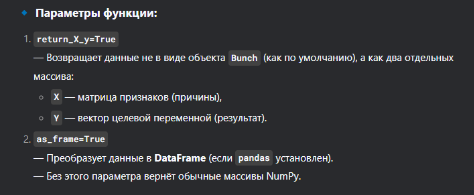

**Базовый EDA**

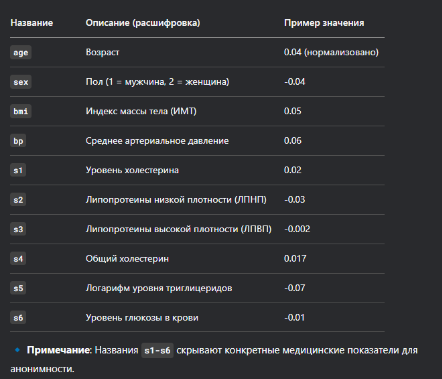

In [10]:
X.head() # покажем что это просто датафрейм

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [15]:
y.head()

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [12]:
X.shape

(442, 10)

In [14]:
X.describe().round(4)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000,442.0000
mean,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000
std,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476,0.0476
min,-0.1072,-0.0446,-0.0903,-0.1124,-0.1268,-0.1156,-0.1023,-0.0764,-0.1261,-0.1378
25%,-0.0373,-0.0446,-0.0342,-0.0367,-0.0342,-0.0304,-0.0351,-0.0395,-0.0332,-0.0332
50%,0.0054,-0.0446,-0.0073,-0.0057,-0.0043,-0.0038,-0.0066,-0.0026,-0.0019,-0.0011
75%,0.0381,0.0507,0.0312,0.0356,0.0284,0.0298,0.0293,0.0343,0.0324,0.0279
max,0.1107,0.0507,0.1706,0.1320,0.1539,0.1988,0.1812,0.1852,0.1336,0.1356


<Axes: >

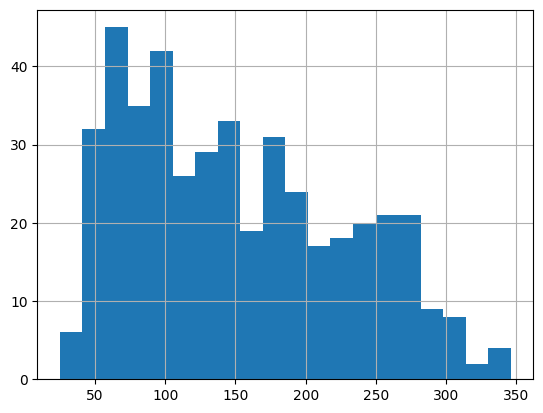

In [17]:
y.hist(bins=20)

Узнаем, есть ли пропуски в данных?

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


Посмотрим на корреляции

<Axes: >

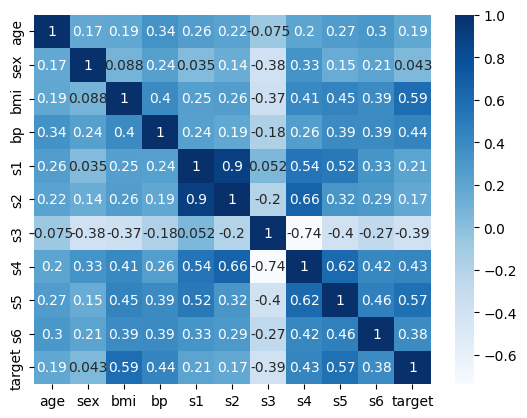

In [21]:
import seaborn as sns

X['target'] = y

sns.heatmap(X.corr(), cmap="Blues", annot=True)

Смотрим на распределение признаков по boxplot

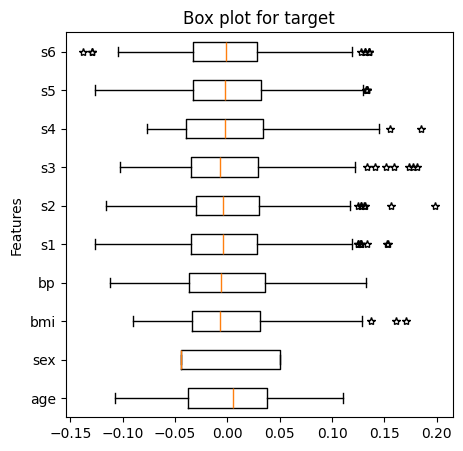

In [22]:
X.drop('target', axis=1, inplace=True)

fig,ax = plt.subplots(figsize=(5,5))
ax.boxplot(x=X,
           vert=False,
           labels=X.columns,
           sym='*'
          )
plt.title('Box plot for target')
plt.ylabel('Features')
plt.plot();

Выводы:

1) Данные без пропусков, очевидных выбросов и центрированы

2) Целевая переменная визуально имеет распределение, близкое к нормальному

3) Данные отображаются в верном формате

4) По boxplot не делаем выводы о том, что надо удалять "выбросы"

5) Целевая переменная имеет линейную взаимосвязь с несколькими признаками. Применение методов машинного обучения обоснованно

**Машинное обучение**

In [23]:
# Разобьем данные на обучающую и тестовую выборки

from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Сама регрессия

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()

model.fit(X_train, y_train)

pred = model.predict(X_test)

print(f'''Metrics:
mae={mean_absolute_error(y_test, pred)}
mse={mean_squared_error(y_test, pred)}
R2={r2_score(y_test, pred)}
''')

Metrics:
mae=41.54850685988061
mse=2848.3106508475057
R2=0.4849058889476755



Метрика должна отражать реальную цель из мира, поэтому нередко возникает потребность в написании своих собственных метрик, которые лучше описывают вашу конретную реальность. В задачах, связанных с медициной (как у нас сейчас), довольно высокая цена ошибки (у человека есть диабет, а мы его не нашли). Поэтому для того, чтобы ответить на вопрос, можно ли модель использовать в жизни, имеет смысл использовать метрику максимальной ошибки модели

$max error = max(|\hat y_{i} - y_{i}|)$

In [26]:
def max_error(y_true, y_pred):
    max_erorr = np.abs(y_true - y_pred).max()
    return max_erorr


print(f'Loss: {max_error(y_test, pred)}')

Loss: 153.65720098110162


**Кросс-валидация**

In [29]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import cross_validate

# проверим на кросс-валидации значения ошибок MSE, MAE, R2
# для линейной регрессии, обученной с помощью функционала MSE
num_splits=5

cv_res = cross_validate(model,
                     X,
                     y,
                     scoring='neg_mean_squared_error', # метрика, которую нужно оценить
                     cv=num_splits # количество разбиений или класс-сплиттер
                    )

print(f"test mse errors are {-cv_res['test_score']}")
print(f"mean test mse = {-cv_res['test_score'].mean()}")

test mse errors are [2779.92344921 3028.83633883 3237.6875877  3008.74648884 2910.21268776]
mean test mse = 2993.0813104693307
